In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

**Load the DataSet**

In [74]:
df = pd.read_csv("TravelInsurancePrediction.csv")
df

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...
1982,1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


**Data Preprocessing**

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [76]:
df.isnull().sum()

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

**Data Visualisation**

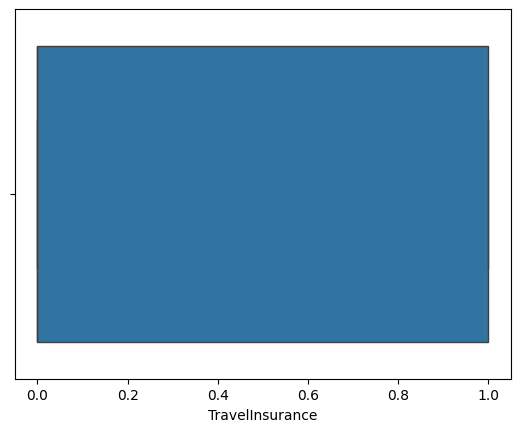

In [77]:
sns.boxplot(x=df["TravelInsurance"])
plt.show()

In [78]:
Q1 = df["TravelInsurance"].quantile(0.25)
print("Q1:",Q1)
Q3 = df["TravelInsurance"].quantile(0.75)
print("Q3:",Q3)
IQR = Q3 - Q1
print("IQR:",IQR)
lower_limit = Q1 - (IQR * 1.5)
upper_limit = Q3 + (IQR * 1.5)
print("lower limit: ",lower_limit)
print("Upper limit: ",upper_limit)

Q1: 0.0
Q3: 1.0
IQR: 1.0
lower limit:  -1.5
Upper limit:  2.5


In [79]:
df[(df["TravelInsurance"]< lower_limit) | (df["TravelInsurance"]> upper_limit)]

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance


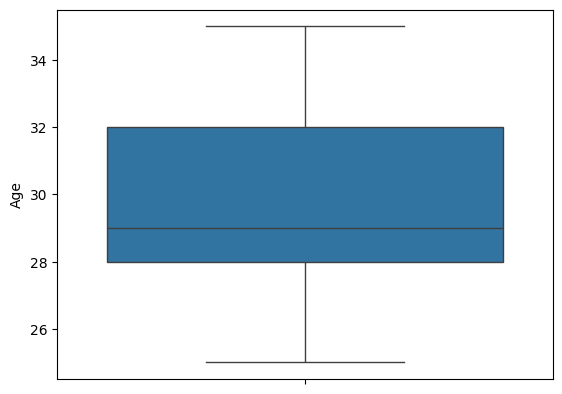

In [80]:
sns.boxplot(y=df["Age"])
plt.show()

In [81]:
Q1 = df["Age"].quantile(0.25)
print("Q1:",Q1)
Q3 = df["Age"].quantile(0.75)
print("Q3:",Q3)
IQR = Q3 - Q1
print("IQR:",IQR)
lower_limit = Q1 - (IQR * 1.5)
upper_limit = Q3 + (IQR * 1.5)
print("lower limit: ",lower_limit)
print("Upper limit: ",upper_limit)

Q1: 28.0
Q3: 32.0
IQR: 4.0
lower limit:  22.0
Upper limit:  38.0


In [82]:
df[(df["Age"]< lower_limit) | (df["Age"]> upper_limit)]

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance


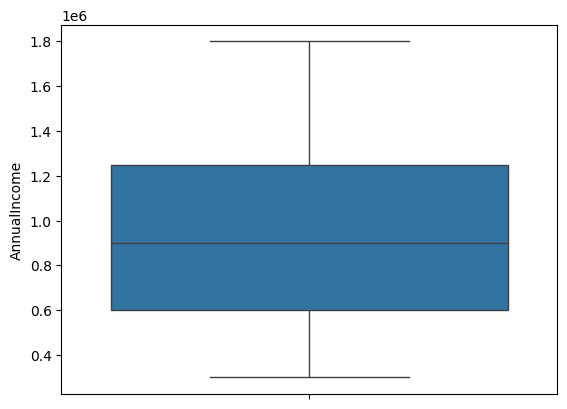

In [83]:
sns.boxplot(y=df["AnnualIncome"])
plt.show()

In [84]:
Q1 = df["AnnualIncome"].quantile(0.25)
print("Q1:",Q1)
Q3 = df["AnnualIncome"].quantile(0.75)
print("Q3:",Q3)
IQR = Q3 - Q1
print("IQR:",IQR)
lower_limit = Q1 - (IQR * 1.5)
upper_limit = Q3 + (IQR * 1.5)
print("lower limit: ",lower_limit)
print("Upper limit: ",upper_limit)

Q1: 600000.0
Q3: 1250000.0
IQR: 650000.0
lower limit:  -375000.0
Upper limit:  2225000.0


In [85]:
df[(df["AnnualIncome"]< lower_limit) | (df["AnnualIncome"]> upper_limit)]

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance


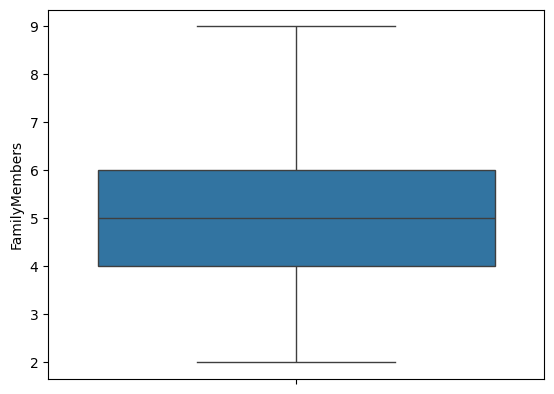

In [86]:
sns.boxplot(y=df["FamilyMembers"])
plt.show()

In [87]:
Q1 = df["FamilyMembers"].quantile(0.25)
print("Q1:",Q1)
Q3 = df["FamilyMembers"].quantile(0.75)
print("Q3:",Q3)
IQR = Q3 - Q1
print("IQR:",IQR)
lower_limit = Q1 - (IQR * 1.5)
upper_limit = Q3 + (IQR * 1.5)
print("lower limit: ",lower_limit)
print("Upper limit: ",upper_limit)

Q1: 4.0
Q3: 6.0
IQR: 2.0
lower limit:  1.0
Upper limit:  9.0


In [88]:
df[(df["FamilyMembers"]< lower_limit) | (df["FamilyMembers"]> upper_limit)]

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance


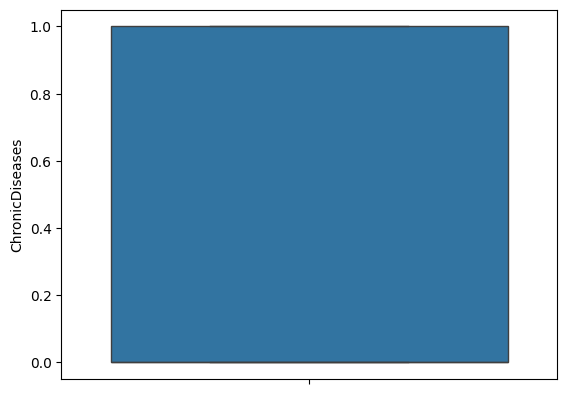

In [89]:
sns.boxplot(y=df["ChronicDiseases"])
plt.show()

In [90]:
Q1 = df["ChronicDiseases"].quantile(0.25)
print("Q1:",Q1)
Q3 = df["ChronicDiseases"].quantile(0.75)
print("Q3:",Q3)
IQR = Q3 - Q1
print("IQR:",IQR)
lower_limit = Q1 - (IQR * 1.5)
upper_limit = Q3 + (IQR * 1.5)
print("lower limit: ",lower_limit)
print("Upper limit: ",upper_limit)

Q1: 0.0
Q3: 1.0
IQR: 1.0
lower limit:  -1.5
Upper limit:  2.5


In [91]:
df[(df["ChronicDiseases"]< lower_limit) | (df["ChronicDiseases"]> upper_limit)]

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance


In [92]:
categoric = []
numeric = []
for i in df.columns:
    if df[i].dtypes=='object':
        categoric.append(i)
    else:
        numeric.append(i)

print("Categorical Values: ",categoric)
print("Numerical Values: ",numeric)

Categorical Values:  ['Employment Type', 'GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad']
Numerical Values:  ['Unnamed: 0', 'Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases', 'TravelInsurance']


<Axes: xlabel='Age', ylabel='Density'>

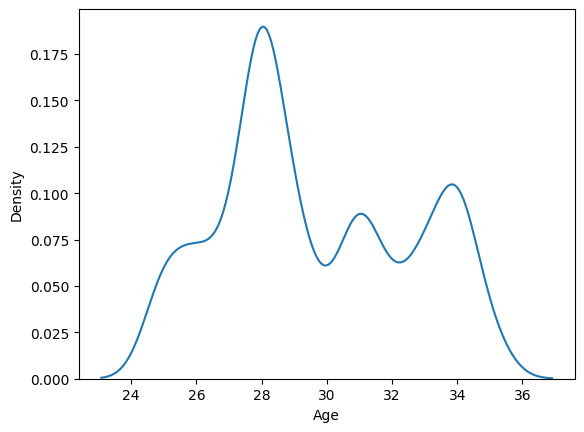

In [93]:
sns.kdeplot(df["Age"])

In [94]:
df["Age"].skew()

0.23962475139295264

<Axes: xlabel='AnnualIncome', ylabel='Density'>

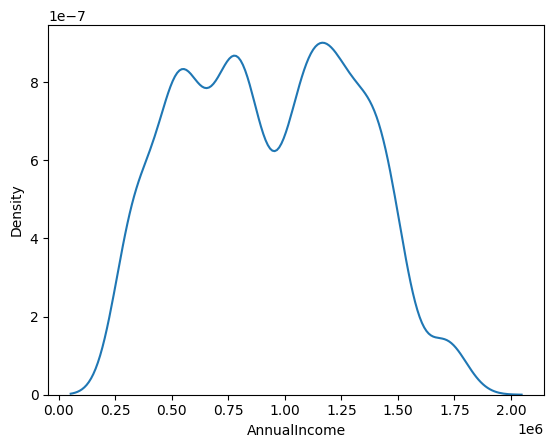

In [95]:
sns.kdeplot(df["AnnualIncome"])

In [96]:
df["AnnualIncome"].skew()

0.07841699043593056

<Axes: xlabel='FamilyMembers', ylabel='Density'>

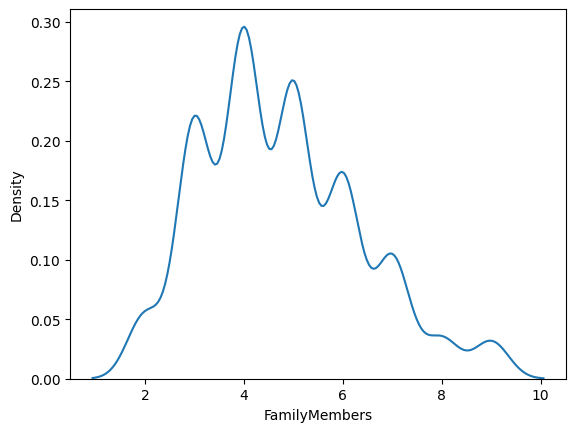

In [97]:
sns.kdeplot(df["FamilyMembers"])

In [98]:
df["FamilyMembers"].skew()

0.5611969123054563

<Axes: xlabel='ChronicDiseases', ylabel='Density'>

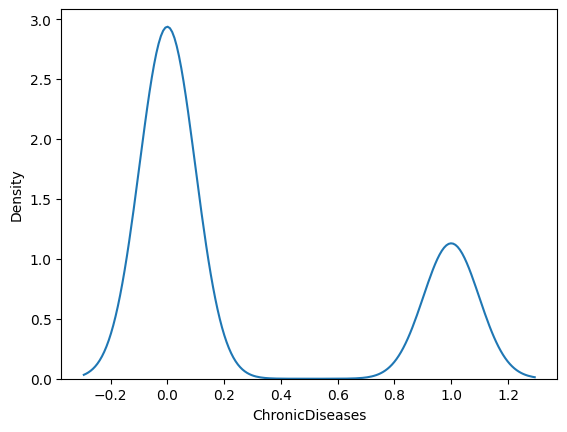

In [99]:
sns.kdeplot(df["ChronicDiseases"])

In [100]:
df["ChronicDiseases"].skew()

0.9928719894631701

<Axes: xlabel='TravelInsurance', ylabel='Density'>

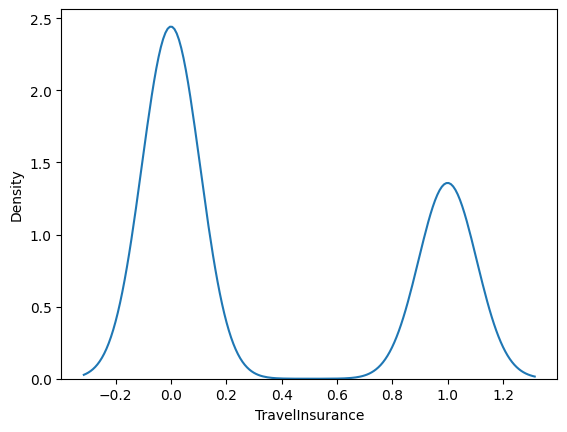

In [101]:
sns.kdeplot(df["TravelInsurance"])

In [102]:
df["TravelInsurance"].skew()

0.5959179680742391

In [103]:
#Converting Categorical Data to Numerical Data using Encoding
le = LabelEncoder()
df['Employment Type'] = le.fit_transform(df['Employment Type'])
df['GraduateOrNot'] = le.fit_transform(df['GraduateOrNot'])
df['EverTravelledAbroad'] = le.fit_transform(df['EverTravelledAbroad'])
df['FrequentFlyer'] = le.fit_transform(df['FrequentFlyer'])
df['TravelInsurance'] = le.fit_transform(df['TravelInsurance'])

In [104]:
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,0,1,400000,6,1,0,0,0
1,1,31,1,1,1250000,7,0,0,0,0
2,2,34,1,1,500000,4,1,0,0,1
3,3,28,1,1,700000,3,1,0,0,0
4,4,28,1,1,700000,8,1,1,0,0


<Axes: xlabel='Age', ylabel='count'>

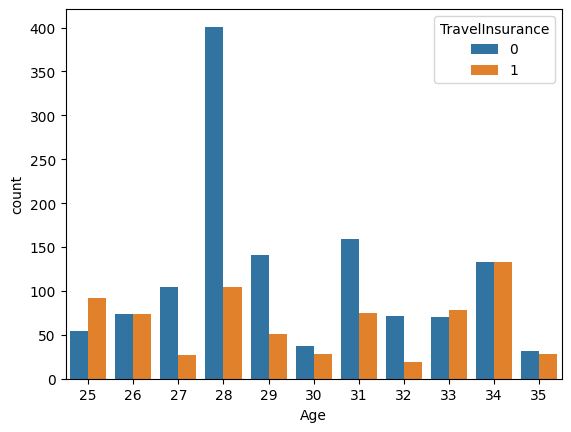

In [105]:
#BiVariate
sns.countplot(x ='Age', hue = "TravelInsurance", data = df)

<Axes: >

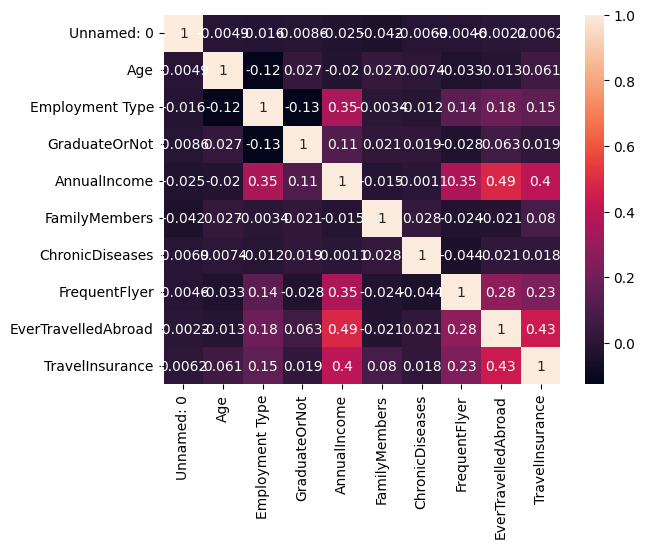

In [107]:
sns.heatmap(df.corr(),annot=True)

In [108]:
x=df.iloc[:,:-1]
x.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,0,31,0,1,400000,6,1,0,0
1,1,31,1,1,1250000,7,0,0,0
2,2,34,1,1,500000,4,1,0,0
3,3,28,1,1,700000,3,1,0,0
4,4,28,1,1,700000,8,1,1,0


In [109]:
y=df.iloc[:,-1]
y.head()

0    0
1    0
2    1
3    0
4    0
Name: TravelInsurance, dtype: int64

In [110]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [111]:
x_scale=pd.DataFrame(scale.fit_transform(x),columns=x.columns)
x_scale.head()


,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,0.000000,0.6,0.0,1.0,0.066667,0.571429,1.0,0.0,0.0
1,0.000504,0.6,1.0,1.0,0.633333,0.714286,0.0,0.0,0.0
2,0.001007,0.9,1.0,1.0,0.133333,0.285714,1.0,0.0,0.0
3,0.001511,0.3,1.0,1.0,0.266667,0.142857,1.0,0.0,0.0
4,0.002014,0.3,1.0,1.0,0.266667,0.857143,1.0,1.0,0.0


In [112]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scale,y,test_size=0.2,random_state=42)


In [113]:
x_train.shape

(1589, 9)

In [114]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.datasets import load_digits

In [115]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()

param_vals = {
    'max_depth': [300, 500, 700, 900, 1100],  # Adjusted the range
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.001, 0.01, 0.1, 0.5, 1],  # Added more values
    'min_samples_split': [20, 50, 100, 200],  # Added min_samples_split
    'min_samples_leaf': [10, 20, 40, 80],  # Added min_samples_leaf
    'subsample': [0.8, 0.9, 1.0]  # Added subsample
}

random_rf = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_vals,
    n_iter=50,  # Increased the number of iterations
    scoring='accuracy',
    cv=5,
    refit=True,
    n_jobs=-1
)

# Training and prediction
random_rf.fit(x_train, y_train)
preds = random_rf.best_estimator_.predict(x_test)
preds

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [116]:
gbc = GradientBoostingClassifier(n_estimators=300,learning_rate=0.05,random_state=100,max_features=5 )

In [117]:
gbc.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=300,
                           random_state=100)

In [118]:
pred_y = gbc.predict(x_test)

In [119]:
#accuracy
acc = accuracy_score(y_test, pred_y)
print("Gradient Boosting Classifier accuracy is : {:.2f}".format(acc))

Gradient Boosting Classifier accuracy is : 0.84


In [120]:
print(classification_report(y_test,pred_y))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89       257
           1       0.98      0.57      0.72       141

    accuracy                           0.84       398
   macro avg       0.89      0.78      0.80       398
weighted avg       0.87      0.84      0.83       398



In [121]:
import pickle

In [122]:
pickle.dump(gbc,open('tip.pkl','wb'))